In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df3_2 = pd.read_csv("C:/Data/Final_Data_to_Work_With/April_28/206col_20_80Split.csv")

In [25]:
df3_2 = df3_2.iloc[:, 1:]

In [27]:
df = df3_2

In [26]:
df3_2.set_index('ECN')

,signal_OWNER_OCPY_REFI_MR,signal_owner_ocpy_eqty_mr,signal_owner_ocpy_home_mr,AcctActivitySearch,LoginApp_SessionLogin,MsgCtr_MsgSelection,Transfer,gmail,yahoo,emails_count_all,...,Proactive_Agg,Transaction_Agg,Complain_Agg,Complain_Resolve_Agg,OweAccnt_Agg,OwnAccnt_Agg,Own_Bal_Agg,Owe_Bal_Agg,Targ_BillPay,Group
ECN,,,,,,,,,,,,,,,,,,,,,
7001793774,40.654992,11.017688,58.850744,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0,Train
11021343,0.000000,0.000000,0.000000,0.333333,3.000000,0.000000,1.0,1.0,1.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,2.386282,0.00,0,Train
210551541856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0,Train
181602621755612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0,Train
313652670110365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112130936,0.000000,0.000000,110.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0,Test
728108006644058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,413.226667,0.00,0,Test
41699900904366,0.000000,0.000000,0.000000,13.333333,62.000000,1.333333,0.0,1.0,1.0,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0,Test


# Data Prep - Run this part every time you use a new model

In [114]:
Train = df[df['Group'] == 'Train']
Test = df[df['Group'] == 'Test']


In [115]:
X_train = Train.drop(['Targ_BillPay', 'Group'], axis = 1)
y_train = Train['Targ_BillPay']


In [116]:
X_test = Test.drop(['Targ_BillPay', 'Group'], axis = 1)
y_test = Test['Targ_BillPay']

In [48]:
#from sklearn.model_selection import train_test_split
#X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #42

In [49]:
#traindf = pd.concat([X_train, y_train], axis = 1)
#traindf['Group'] = "Train"

In [50]:
#testdf = pd.concat([X_test, y_test], axis = 1)
#testdf['Group'] = "Test"

In [117]:
df_train = pd.concat([X_train,y_train], axis = 1)

class1 = df_train[df_train.iloc[:,-1] == 1]
class0 = df_train[df_train.iloc[:,-1] == 0]

class0_adj = class0.sample(frac = 0.00132, random_state = 42)


In [118]:
df_train_resampled = pd.concat([class1, class0_adj], axis = 0)

In [119]:
df_train_resampled.Targ_BillPay.value_counts()

1    641
0    640
Name: Targ_BillPay, dtype: int64

In [120]:
X_train = df_train_resampled.iloc[:,:-1]
y_train = df_train_resampled.iloc[:,-1]

In [121]:
df_test = pd.concat([X_test,y_test], axis = 1)

class1 = df_test[df_test.iloc[:,-1] == 1]
class0 = df_test[df_test.iloc[:,-1] == 0]

class0_adj = class0.sample(frac = 0.00135, random_state = 42)

In [122]:
df_test_resampled = pd.concat([class1, class0_adj], axis = 0)

In [123]:
df_test_resampled.Targ_BillPay.value_counts()

1    175
0    164
Name: Targ_BillPay, dtype: int64

In [124]:
X_test = df_test_resampled.iloc[:,:-1]
y_test = df_test_resampled.iloc[:,-1]

In [125]:
X_train = X_train.set_index('ECN')
X_test = X_test.set_index("ECN")

# End of Data Prep

# Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
class_weight = {0:1,1:1}
forest = RandomForestClassifier(random_state=5, class_weight = class_weight, n_jobs = -1)


In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest, X_train, y_train, cv=3, scoring="roc_auc")

array([0.762483  , 0.75706419, 0.74994515])

In [76]:
y_train.value_counts()

1    641
0    640
Name: Targ_BillPay, dtype: int64

In [77]:
X_train.shape


(1281, 204)

In [78]:
y_test.value_counts()

1    175
0    164
Name: Targ_BillPay, dtype: int64

In [126]:
model1 = forest.fit(X_train,y_train)


In [136]:
from sklearn.metrics import confusion_matrix
pred_y = model1.predict(X_test)
conf_mx = confusion_matrix(y_test, pred_y)
conf_mx

array([[119,  45],
       [ 42, 133]], dtype=int64)

In [261]:
conf_mx2 #previous treatment

array([[199122,    780],
       [   274,      9]], dtype=int64)

In [66]:
import joblib
import pandas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from time import time
from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels,pred),3)
    precision = round(precision_score(labels,pred),3)
    recall = round(recall_score(labels,pred),3)
    f1 = round(f1_score(labels,pred),3)
    roc = round(roc_auc_score(labels,pred),3)
    
    print('{} -- Accuracy:{} / Precision:{} / Recall:{} / F1:{} / ROC:{} / Latency:{}ms'.format(name, accuracy, precision, recall,f1,roc ,round(end-start)))

In [128]:
evaluate_model('Forest', model1, X_test, y_test)

Forest -- Accuracy:0.743 / Precision:0.747 / Recall:0.76 / F1:0.754 / ROC:0.743 / Latency:0ms


In [346]:
#evaluate_model('Forest', model2, X_test, y_test)

Forest -- Accuracy:0.591 / Precision:0.003 / Recall:0.823 / F1:0.006 / ROC:0.707 / Latency:2ms


In [115]:
#evaluate_model('Forest', model, X_test, y_test)

Forest -- Accuracy:0.648 / Precision:0.003 / Recall:0.743 / F1:0.006 / ROC:0.696 / Latency:1ms


In [118]:
#evaluate_model('Forest', model2, X_test, y_test)

Forest -- Accuracy:0.623 / Precision:0.003 / Recall:0.779 / F1:0.006 / ROC:0.701 / Latency:2ms


# RFE

In [82]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

Optimal number of features : 47


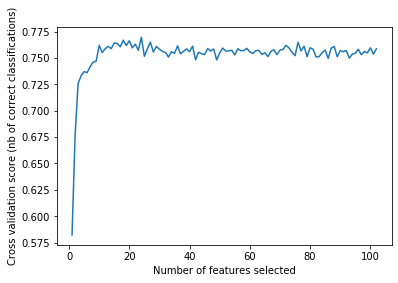

In [88]:
#Recursive Feasture Selection

rfecv = RFECV(estimator=forest, step=2, cv=StratifiedKFold(3),
              scoring='roc_auc', n_jobs = -1)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [86]:
X_train

,ECN,signal_OWNER_OCPY_REFI_MR,signal_owner_ocpy_eqty_mr,signal_owner_ocpy_home_mr,AcctActivitySearch,LoginApp_SessionLogin,MsgCtr_MsgSelection,Transfer,gmail,yahoo,...,MobileActivity_Agg,Transfer_Agg,Proactive_Agg,Transaction_Agg,Complain_Agg,Complain_Resolve_Agg,OweAccnt_Agg,OwnAccnt_Agg,Own_Bal_Agg,Owe_Bal_Agg
1264,285917232146518,0.0,0.0,0.0,4.333333,20.666667,0.000000,1.000000,1.0,0.0,...,5.333333,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,1.071102,0.000000
1278,329988802153216,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,...,0.333333,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1315,317057450328410,378.0,0.0,156.0,0.333333,8.333333,0.000000,0.000000,0.0,1.0,...,0.333333,0.0,0.000000,0.000000,0.0,0.0,3.0,0.0,12984.540000,226015.196667
1748,730110035774432,0.0,0.0,0.0,2.333333,4.333333,0.000000,1.333333,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2140,530520631813263,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,1.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87956,177083291751414,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
129025,473176451614513,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,...,0.333333,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
287462,51553462221517,0.0,0.0,0.0,1.000000,11.333333,0.666667,0.000000,1.0,0.0,...,0.666667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
286810,287431132102360,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,...,11.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [89]:
rferanking = zip(X_train.columns, rfecv.ranking_)
rferanking = pd.DataFrame(rferanking)
rferanking = rferanking.sort_values(by = 1)
rferanking


,0,1
62,eom_bal_y,1
113,MIN_OPEN_DT,1
40,OFRPRSNT,1
41,PAGELOADD,1
42,PAGEVIEWD,1
...,...,...
154,MBL_ACT_ANY_SVC_1_MO_IND,77
200,OwnAccnt_Agg,78
15,paper_statement,78
197,Complain_Agg,79


In [90]:
rfe_selection_list = list(rferanking[rferanking[1]  == 1][0])
X_train_rfe = X_train[rfe_selection_list]


In [92]:
cross_val_score(forest, X_train_rfe, y_train, cv=3, scoring="roc_auc")

array([0.77955114, 0.75697644, 0.75100917])

In [94]:
model3 = forest.fit(X_train_rfe, y_train)

In [95]:
X_test_rfe = X_test[rfe_selection_list]

In [97]:
from sklearn.metrics import confusion_matrix
pred_y = model3.predict(X_test_rfe)
conf_mx2 = confusion_matrix(y_test, pred_y)
conf_mx2

array([[118,  46],
       [ 42, 133]], dtype=int64)

In [98]:
evaluate_model('Forest', model, X_test_rfe, y_test)

Forest -- Accuracy:0.74 / Precision:0.743 / Recall:0.76 / F1:0.751 / ROC:0.74 / Latency:0ms


In [ ]:
#accuracy actually dropped with RFE a little bit

# GridSearch

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
parameters = {
    
    
    'max_depth':[4,5,6,7],
    'n_estimators':[100, 50, 300, 400],
    'criterion':['entropy'],
    'min_samples_leaf':[5,6,7,10]

}

cv = GridSearchCV(forest, parameters, cv = 3, scoring = 'roc_auc')
cv.fit(X_train, y_train) 

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 1, 1: 1},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=5,
                             

In [101]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 1},
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [104]:
forest_best = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 1},
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [105]:
model2 = forest_best.fit(X_train,y_train)

In [106]:
from sklearn.metrics import confusion_matrix
pred_y = model2.predict(X_test)
conf_mx2 = confusion_matrix(y_test, pred_y)
conf_mx2

array([[106,  58],
       [ 34, 141]], dtype=int64)

In [70]:
cross_val_score(forest_best, X_train, y_train, cv=3, scoring="accuracy")

array([0.6995614 , 0.71052632, 0.74725275])

In [107]:
evaluate_model('Forest', model2, X_test, y_test)

Forest -- Accuracy:0.729 / Precision:0.709 / Recall:0.806 / F1:0.754 / ROC:0.726 / Latency:0ms


In [ ]:
#ROC dropped with parameter tuning a little bit too, default setting works the best.

In [108]:
from rfpimp import *

C:\Users\ruiqingh\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [129]:
imp = importances(model1, X_test, y_test)

In [132]:
imp

,Importance
Feature,
DAYS_SINCE_BEV_LST_SGN,0.011799
MBL_ACCT_SUMM_PG_CNT,0.008850
MAX_OPEN_DT,0.008850
ACCTSRVINQ,0.008850
DAYS_SINCE_OLB_AGREE_ESN,0.008850
OLB_SGN_CNT,0.008850
NIBT_CK_CONS_PRIM_EOM_BAL,0.005900
SAV_CONS_AVG_DY_BAL,0.005900
OLB_PRI_90_DY_ACT_IND,0.005900


In [131]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

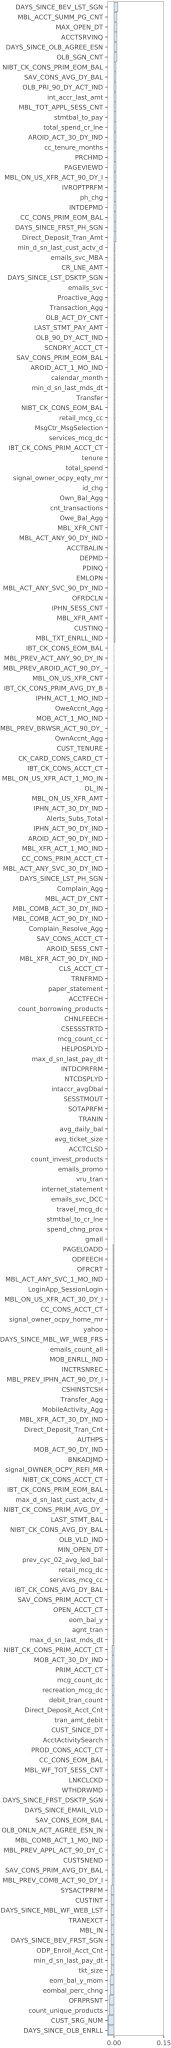

In [133]:
plot_importances(imp)

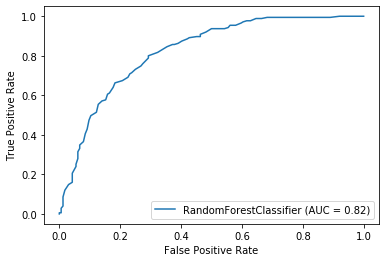

In [134]:
from sklearn.metrics import plot_roc_curve

forest_roc = plot_roc_curve(model1, X_test, y_test)
plt.show()

In [135]:
import seaborn as sns
def heatMap(df):
    #Create Correlation df
    corr = df
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(10, 220, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)+1), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)+1), corr.columns)
    plt.title("Confusion Matrix", size = 20)
    #show plot
    plt.show()

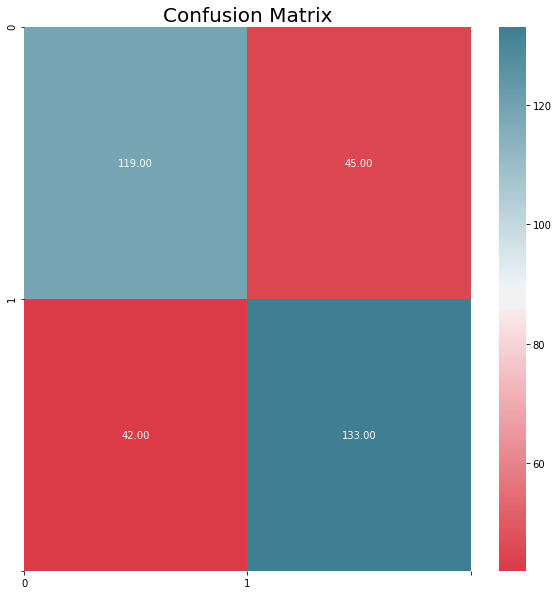

In [137]:
heatMap(pd.DataFrame(conf_mx))